## Import libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Load Data

In [28]:
DATA_DIR = "data"

# Load into a dataset
df = pd.read_csv(f"{DATA_DIR}/osteoporosis.csv")
df.head().T

,0,1,2,3,4
Id,104866,101999,106567,102316,101944
Age,69,32,89,78,38
Gender,Female,Female,Female,Female,Male
Hormonal Changes,Normal,Normal,Postmenopausal,Normal,Postmenopausal
Family History,Yes,Yes,No,No,Yes
Race/Ethnicity,Asian,Asian,Caucasian,Caucasian,African American
Body Weight,Underweight,Underweight,Normal,Underweight,Normal
Calcium Intake,Low,Low,Adequate,Adequate,Low
Vitamin D Intake,Sufficient,Sufficient,Sufficient,Insufficient,Sufficient
Physical Activity,Sedentary,Sedentary,Active,Sedentary,Active


## Exploratory Data Analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [30]:
df.describe(include="object").T

,count,unique,top,freq
Gender,1958,2,Male,992
Hormonal Changes,1958,2,Normal,981
Family History,1958,2,No,998
Race/Ethnicity,1958,3,African American,681
Body Weight,1958,2,Normal,1027
Calcium Intake,1958,2,Low,1004
Vitamin D Intake,1958,2,Sufficient,1011
Physical Activity,1958,2,Active,1021
Smoking,1958,2,Yes,982
Alcohol Consumption,970,1,Moderate,970


In [31]:
df.describe()

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


In [32]:
df.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [33]:
df.duplicated().sum()

0

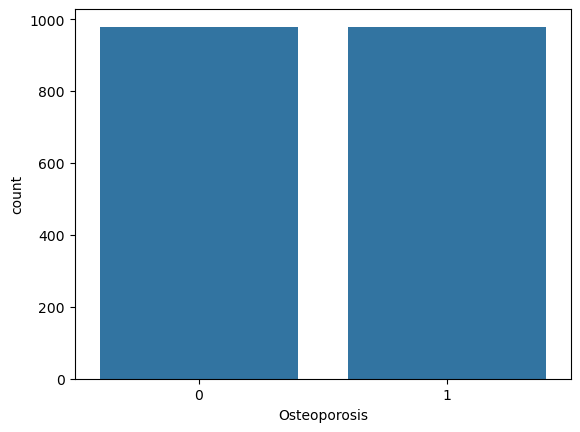

In [34]:
sns.countplot(data=df, x='Osteoporosis')
plt.show()

## Preprocessing

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [36]:
# Split features and target
X = df.drop(['Id', 'Osteoporosis'], axis=1)
y = df.Osteoporosis

In [37]:
# Select numeric and categorical features
num_cols = [col for col in X.columns if X[col].dtype in ['float', 'int']]
cat_cols = [col for col in X.columns if X[col].dtype == 'object']

In [65]:
# Preprocessing for Numeric Features
# Just imputing using the median
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Preprocessing for Categorical Features
# Imputing then encoding with One-Hot Encodig
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [39]:
# Create a pipeline to preprocess all the data
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

### Training and Validation

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(1566, 14)

In [57]:
# Create a model
model = RandomForestClassifier()

# Create a pipeline for training
pipe = Pipeline(steps=[
    ('prep', preprocessor),
    ('model', model)
])
pipe.fit(X_train, y_train) # Fit model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Hormonal Changes',
                                                   'Family History',
                                                   'Race/Ethnicity',
                                                   'Body Weight',
                                                   'Calcium Intake',
                                                   'Vitamin D Intake',
                                                   'Physical Activity',
                                                   'Smoking',
                                                   'Alcohol Consumption',
                                                   'Medical Conditions',
                                                   'Medications',
                                                   'Prior Fractures'])])),
                ('model', RandomForestClassifier())])

In [59]:
# Make predictions with the model
preds = pipe.predict(X_test)
preds

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [60]:
# Measure the accuracy of the model
print(f'Model Accuracy: {accuracy_score(y_test, preds)}')

Model Accuracy: 0.8290816326530612


## Save Model

In [61]:
import joblib

In [64]:
# Save model for later use
joblib.dump(model, "base_model.joblib")

['base_model.joblib']